In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('/content/cars.csv')

In [ ]:
df.shape

(8128, 5)

In [ ]:
df

,brand,km_driven,fuel,owner,selling_price
0,Maruti,145500,Diesel,First Owner,450000
1,Skoda,120000,Diesel,Second Owner,370000
2,Honda,140000,Petrol,Third Owner,158000
3,Hyundai,127000,Diesel,First Owner,225000
4,Maruti,120000,Petrol,First Owner,130000
...,...,...,...,...,...
8123,Hyundai,110000,Petrol,First Owner,320000
8124,Hyundai,119000,Diesel,Fourth & Above Owner,135000
8125,Maruti,120000,Diesel,First Owner,382000
8126,Tata,25000,Diesel,First Owner,290000


In [ ]:
df.isnull().sum()

brand            0
km_driven        0
fuel             0
owner            0
selling_price    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   brand          8128 non-null   object
 1   km_driven      8128 non-null   int64 
 2   fuel           8128 non-null   object
 3   owner          8128 non-null   object
 4   selling_price  8128 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 317.6+ KB


In [ ]:
df[['brand', 'owner','fuel']]

,brand,owner,fuel
0,Maruti,First Owner,Diesel
1,Skoda,Second Owner,Diesel
2,Honda,Third Owner,Petrol
3,Hyundai,First Owner,Diesel
4,Maruti,First Owner,Petrol
...,...,...,...
8123,Hyundai,First Owner,Petrol
8124,Hyundai,Fourth & Above Owner,Diesel
8125,Maruti,First Owner,Diesel
8126,Tata,First Owner,Diesel


In [ ]:
df['brand'].unique()

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Fiat', 'Datsun', 'Jeep',
       'Mercedes-Benz', 'Mitsubishi', 'Audi', 'Volkswagen', 'BMW',
       'Nissan', 'Lexus', 'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo',
       'Kia', 'Force', 'Ambassador', 'Ashok', 'Isuzu', 'Opel', 'Peugeot'],
      dtype=object)

In [ ]:
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [ ]:
df['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder(categories=[['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Fiat', 'Datsun', 'Jeep',
       'Mercedes-Benz', 'Mitsubishi', 'Audi', 'Volkswagen', 'BMW',
       'Nissan', 'Lexus', 'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo',
       'Kia', 'Force', 'Ambassador', 'Ashok', 'Isuzu', 'Opel', 'Peugeot'],['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'],['Diesel', 'Petrol', 'LPG', 'CNG']])
df[['brand', 'owner','fuel']]= oe.fit_transform(df[['brand', 'owner','fuel']])

In [ ]:
oe.categories_

[array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
        'Mahindra', 'Tata', 'Chevrolet', 'Fiat', 'Datsun', 'Jeep',
        'Mercedes-Benz', 'Mitsubishi', 'Audi', 'Volkswagen', 'BMW',
        'Nissan', 'Lexus', 'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo',
        'Kia', 'Force', 'Ambassador', 'Ashok', 'Isuzu', 'Opel', 'Peugeot'],
       dtype=object),
 array(['First Owner', 'Second Owner', 'Third Owner',
        'Fourth & Above Owner', 'Test Drive Car'], dtype=object),
 array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)]

In [ ]:
df[['brand', 'owner']]

,brand,owner
0,0.0,0.0
1,1.0,1.0
2,2.0,2.0
3,3.0,0.0
4,0.0,0.0
...,...,...
8123,3.0,0.0
8124,3.0,3.0
8125,0.0,0.0
8126,8.0,0.0


In [ ]:
df

,brand,km_driven,fuel,owner,selling_price
0,0.0,145500,0.0,0.0,450000
1,1.0,120000,0.0,1.0,370000
2,2.0,140000,1.0,2.0,158000
3,3.0,127000,0.0,0.0,225000
4,0.0,120000,1.0,0.0,130000
...,...,...,...,...,...
8123,3.0,110000,1.0,0.0,320000
8124,3.0,119000,0.0,3.0,135000
8125,0.0,120000,0.0,0.0,382000
8126,8.0,25000,0.0,0.0,290000


In [ ]:
df['fuel'].value_counts()

0.0    4402
1.0    3631
3.0      57
2.0      38
Name: fuel, dtype: int64

In [ ]:
df=df.iloc[:,2:]
df

,fuel,owner,selling_price
0,0.0,0.0,450000
1,0.0,1.0,370000
2,1.0,2.0,158000
3,0.0,0.0,225000
4,1.0,0.0,130000
...,...,...,...
8123,1.0,0.0,320000
8124,0.0,3.0,135000
8125,0.0,0.0,382000
8126,0.0,0.0,290000


In [ ]:
df.sample(5)

,fuel,owner,selling_price
4760,1.0,0.0,680000
3995,1.0,0.0,290000
3728,1.0,1.0,484999
451,1.0,0.0,675000
6792,1.0,2.0,200000


In [ ]:
X= df.drop('selling_price', axis=1)
y= df['selling_price']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)
X_train.shape, X_test.shape

((5689, 2), (2439, 2))

In [ ]:
#x' = (x- mean)/std

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# transform train and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
scaler.mean_

array([0.47688522, 0.45983477])

In [ ]:
X_train

,fuel,owner
2246,1.0,0.0
2095,0.0,1.0
3290,1.0,0.0
6868,1.0,0.0
6895,0.0,0.0
...,...,...
7935,1.0,2.0
5192,0.0,0.0
3980,1.0,0.0
235,0.0,1.0


In [ ]:
X_train_scaled

array([[ 0.95159126, -0.63587392],
       [-0.86749566,  0.7469574 ],
       [ 0.95159126, -0.63587392],
       ...,
       [ 0.95159126, -0.63587392],
       [-0.86749566,  0.7469574 ],
       [ 0.95159126, -0.63587392]])

In [ ]:
np.round(X_train_scaled, 1)

array([[ 1. , -0.6],
       [-0.9,  0.7],
       [ 1. , -0.6],
       ...,
       [ 1. , -0.6],
       [-0.9,  0.7],
       [ 1. , -0.6]])

In [ ]:
X_train_scaled.dtype

dtype('float64')

In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

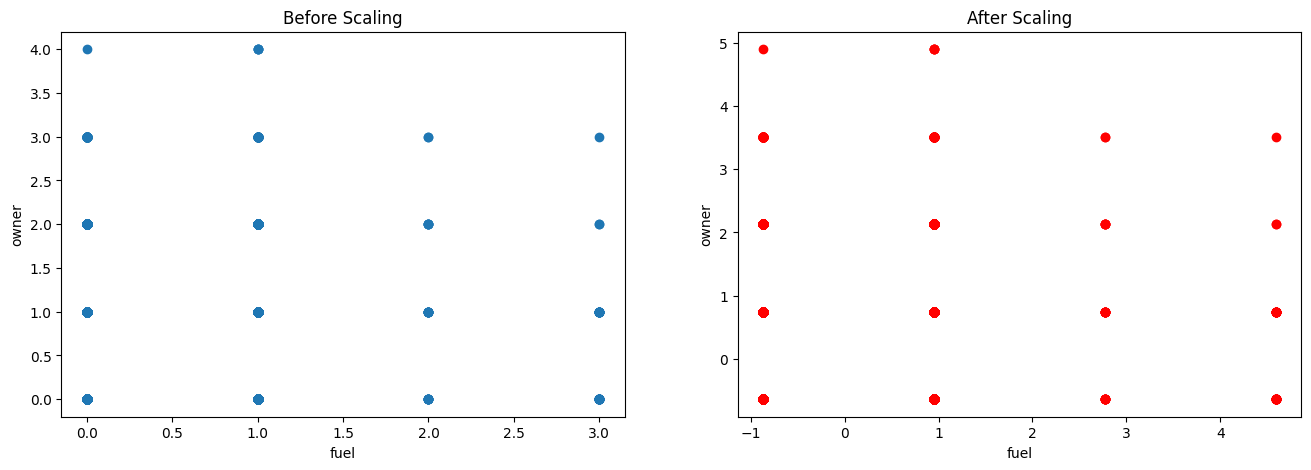

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.scatter(X_train['fuel'], X_train['owner'])
plt.xlabel('fuel')
plt.ylabel('owner')
plt.title('Before Scaling')

plt.subplot(1,2,2)
plt.scatter(X_train_scaled['fuel'], X_train_scaled['owner'],color='red')
plt.xlabel('fuel')
plt.ylabel('owner')
plt.title('After Scaling')


plt.show()

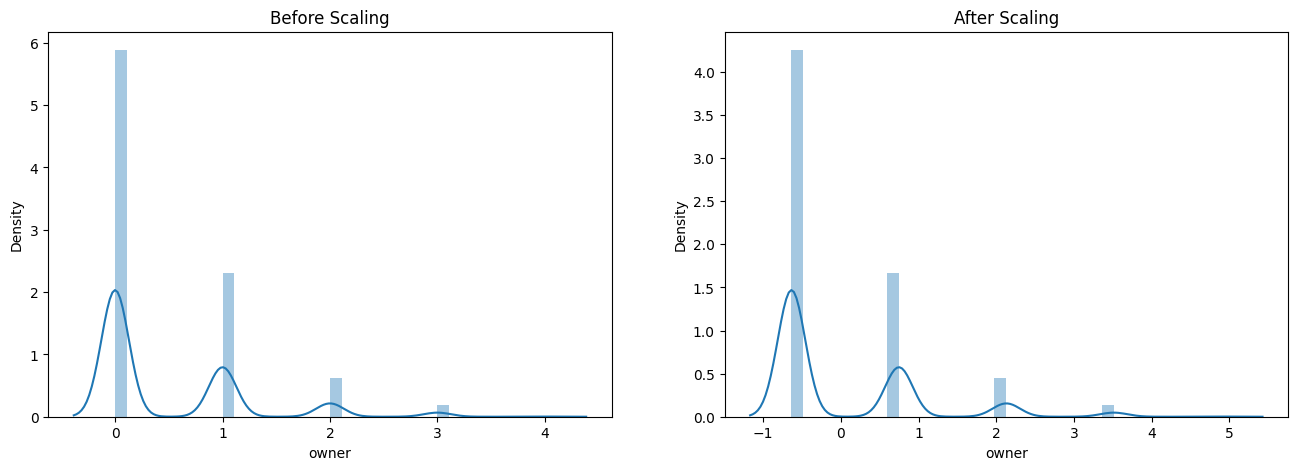

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(X_train['owner'])
plt.title('Before Scaling')

plt.subplot(1,2,2)
sns.distplot(X_train_scaled['owner'])
plt.title('After Scaling')

plt.show()

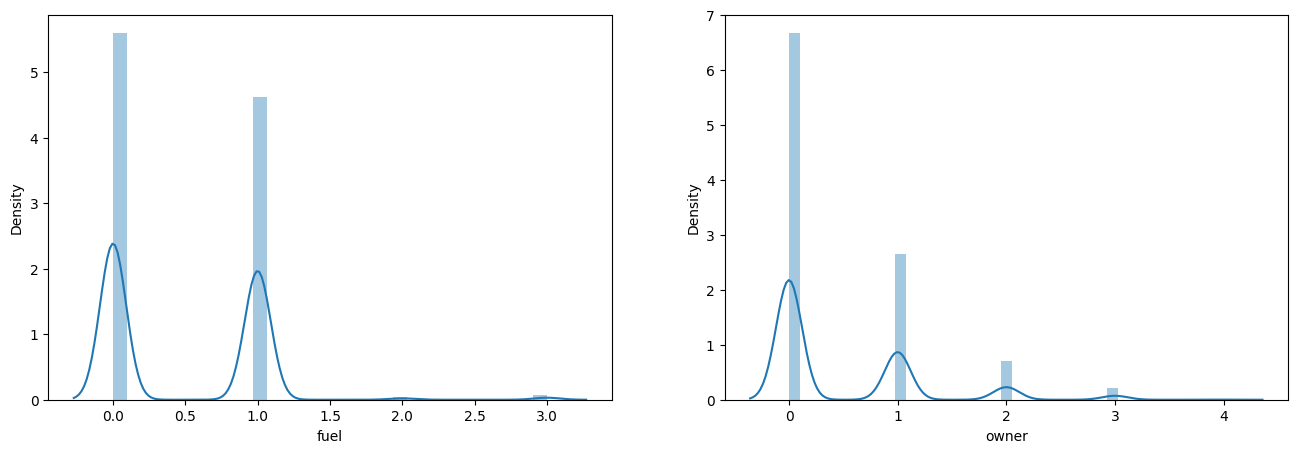

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['fuel'])

plt.subplot(1,2,2)
sns.distplot(df['owner'])

plt.show()

In [ ]:
df['owner'].skew()

1.5997747815652719

In [ ]:
print("Mean value of owner",df['owner'].mean())
print("Std value of owner",df['owner'].std())
print("Min value of owner",df['owner'].min())
print("Max value of owner",df['owner'].max())

Mean value of owner 0.4622293307086614
Std value of owner 0.7218235323319494
Min value of owner 0.0
Max value of owner 4.0


In [ ]:
upper_limit= df['owner'].mean() + 3*df['owner'].std()
lower_limit= df['owner'].mean() - 3*df['owner'].std()

In [ ]:
# Finding outlier
outlier = df[(df['owner'] > upper_limit) | (df['owner'] < lower_limit)]
outlier

,fuel,owner,selling_price
123,0.0,3.0,370000
126,1.0,3.0,105000
275,0.0,3.0,500000
327,1.0,3.0,254999
328,1.0,3.0,65000
...,...,...,...
7916,0.0,3.0,600000
8017,0.0,3.0,60000
8041,1.0,3.0,90000
8067,0.0,3.0,360000


In [ ]:
# Removing outlier
new_df = df[(df['owner'] < upper_limit) & (df['owner'] > lower_limit)]
new_df.shape

(7949, 3)

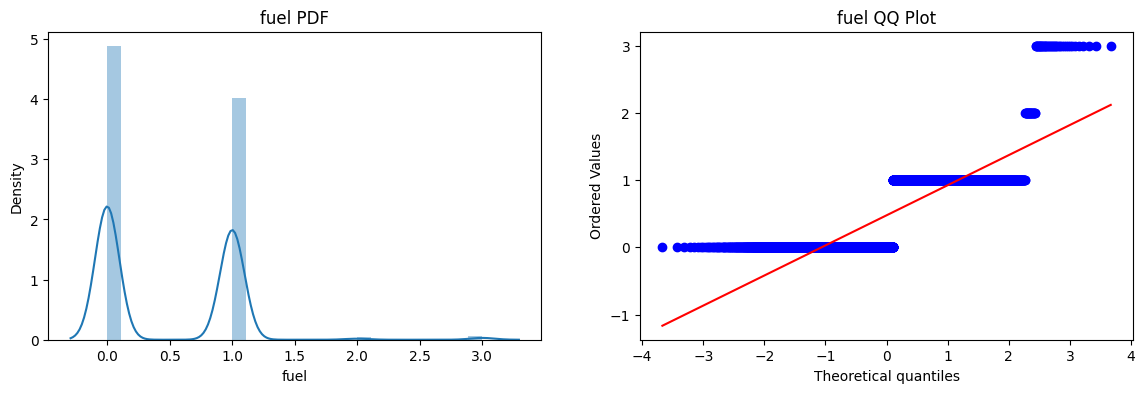

In [ ]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.distplot(X_train['fuel'])
plt.title('fuel PDF')

plt.subplot(1,2,2)
stats.probplot(X_train['fuel'], dist="norm", plot=plt)
plt.title('fuel QQ Plot')

plt.show()